In [9]:
import sqlite3 as sql
import pandas as pd
import xarray as xr

%matplotlib inline

In [2]:
conn = sql.connect("/perm/mo/moc0/kaggle_188-million-us-wildfires/FPA_FOD_20170508.sqlite")
df = pd.read_sql("Select * from fires", con = conn)

Converting date on which fire was controlled and discovery date from julian date to regular format

In [3]:
epoch = pd.to_datetime(0, unit='s').to_julian_date()
df['CONT_DATE'] = pd.to_datetime(df['CONT_DATE'] - epoch, unit='D')
df['DISCOVERY_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - epoch, unit = 'D')
df['FIRE_DURATION'] = df['CONT_DATE'] - df['DISCOVERY_DATE']
df['FIRE_DURATION'] = df['FIRE_DURATION'].dt.days
df['FIRE_DURATION'].fillna(df['FIRE_DURATION'].mean(),inplace = True)
df['FIRE_DURATION'] = df['FIRE_DURATION'].apply(lambda x : int(x))
# df = df.drop(['OBJECTID', 'Shape'], 1)
# df1.head().T
# len(df1['FIRE_NAME'].unique())

In [6]:
# Open FWI ERA5 as dataset
ds = xr.open_dataset("/scratch/rd/nen/perClaudia/era5/fwi_era5_1992_2015_rotated_usa.nc")
ds

<xarray.Dataset>
Dimensions:  (lat: 193, lon: 405, time: 8766)
Coordinates:
  * time     (time) datetime64[ns] 1992-01-01 1992-01-02 ... 2015-12-31
  * lon      (lon) float32 -178.875 -178.59375 -178.3125 ... -65.53125 -65.25
  * lat      (lat) float32 70.96014 70.67911 70.39808 ... 17.283367 17.002337
Data variables:
    fwi      (time, lat, lon) float32 ...
Attributes:
    CDI:               Climate Data Interface version 1.9.6 (http://mpimet.mp...
    history:           Tue Nov 19 16:28:23 2019: cdo sellonlatbox,-179,-65,17...
    Conventions:       CF-1.6
    Reference date:    19800101
    ECMWF fire model:  3.0
    Lincense:          Copernicus
    version:           3.0
    NCO:               netCDF Operators version 4.7.8 (Homepage = http://nco....
    CDO:               Climate Data Operators version 1.9.6 (http://mpimet.mp...

In [7]:
da = ds.fwi
da

<xarray.DataArray 'fwi' (time: 8766, lat: 193, lon: 405)>
[685194390 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1992-01-01 1992-01-02 ... 2015-12-31
  * lon      (lon) float32 -178.875 -178.59375 -178.3125 ... -65.53125 -65.25
  * lat      (lat) float32 70.96014 70.67911 70.39808 ... 17.283367 17.002337
Attributes:
    units:    -
    title:    Fire Weather Index

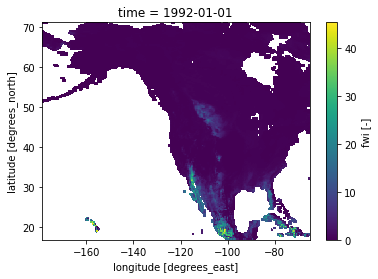

In [10]:
# Plot the first reanalysis layer (1992-01-01)
fwi = da[0]
fwi.plot();

In [20]:
for oneday in pd.date_range(start = '1992-01-01', end = '1992-01-03'):
    fwi = da.loc[dict(time = slice(oneday))]
    fwi

In [16]:
?pd.date_range